In [ ]:
# inline plotting instead of popping out
%matplotlib inline

import os
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)

X = pd.DataFrame(data=X, columns=init_data['feature_names'])
y = pd.DataFrame(data=y, columns=['label'])
y = y['label']

print(X)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

 1) worst concave points           0.141849
 2) mean concave points            0.117697
 3) worst radius                   0.110919
 4) worst perimeter                0.105243
 5) mean concavity                 0.077163
 6) worst area                     0.073364
 7) area error                     0.041760
 8) mean perimeter                 0.036943
 9) mean radius                    0.035625
10) worst concavity                0.035205
11) mean area                      0.032890
12) worst texture                  0.022736
13) mean texture                   0.018584
14) worst compactness              0.016786
15) radius error                   0.015408
16) worst symmetry                 0.014770
17) worst smoothness               0.014235
18) mean compactness               0.010085
19) perimeter error                0.010040
20) worst fractal dimension        0.009015
21) concave points error           0.008085
22) compactness error              0.007420
23) mean smoothness             

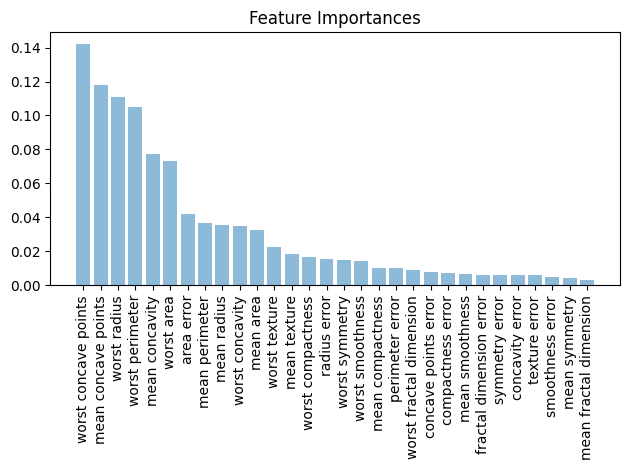

In [ ]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            X.columns.values[indices[f]],
                            importances[indices[f]]))

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]),
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# put prefitted RandomForestClassifier "forest" into SelectFromModel
sfm = SelectFromModel(forest, threshold=0.111, prefit=True)
Z_forest_alt = sfm.transform(X.values)

num = Z_forest_alt.shape[1];
print('select %d features '%num)
for f in range(Z_forest_alt.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            X.columns.values[indices[f]],
                            importances[indices[f]]))
X = X.iloc[:,indices[:num]]
print(X)

select 2 features 
 1) worst concave points           0.141849
 2) mean concave points            0.117697
     worst concave points  mean concave points
0                  0.2654              0.14710
1                  0.1860              0.07017
2                  0.2430              0.12790
3                  0.2575              0.10520
4                  0.1625              0.10430
..                    ...                  ...
564                0.2216              0.13890
565                0.1628              0.09791
566                0.1418              0.05302
567                0.2650              0.15200
568                0.0000              0.00000

[569 rows x 2 columns]


In [ ]:
print('train a random forest based on these features again')
print(X)
# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train a RandomForestClassifier as model
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200,
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy per feature: %.2f' % (accuracy_score(y_test, y_pred)/X.shape[1]))

train a random forest based on these features again
     worst concave points  mean concave points
0                  0.2654              0.14710
1                  0.1860              0.07017
2                  0.2430              0.12790
3                  0.2575              0.10520
4                  0.1625              0.10430
..                    ...                  ...
564                0.2216              0.13890
565                0.1628              0.09791
566                0.1418              0.05302
567                0.2650              0.15200
568                0.0000              0.00000

[569 rows x 2 columns]
Accuracy: 0.89
Accuracy per feature: 0.44
